Ogulcan ULU

Matricola Number: 2105922

Machine Learning for Brain and Cognition Project

# Tumor Detection using Machine Learning

#### **Purpose:**
The purpose of this project is to build a machine learning model using scikit-learn to classify brain MRI images into two categories: **Tumor** and **No-Tumor**.

#### **Dataset:**  
The dataset includes 2000 images, evenly split between the following categories:  
- **Tumor:** Glioma, Meningioma, and Pituitary tumors, merged into one file.  
  - Note: This project focuses on detecting the **presence** of a tumor, not classifying its type.  
- **No-Tumor:** Healthy cases without tumors.


In [ ]:
#Since the data will be used is stored on Drive, It is needed to connect to drive and
#grant access to read and write files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Specifying folder paths
TUMOR_PATH = '/content/drive/MyDrive/Colab Notebooks/DATA/tumor'
NOTUMOR_PATH = '/content/drive/MyDrive/Colab Notebooks/DATA/notumor'


In [ ]:
#To see if GoogleColab can access and see files as I have directed
#in previous line of code.

import os

print("Tumor folder files (showing first 5):")
tumor_files = os.listdir(TUMOR_PATH)
print(tumor_files[:5])  # Just print the first 5

print("\nNo-Tumor folder files (showing first 5):")
no_tumor_files = os.listdir(NOTUMOR_PATH)
print(no_tumor_files[:5])

print(f"\nTumor folder count: {len(tumor_files)}")
print(f"No-Tumor folder count: {len(no_tumor_files)}")


Tumor folder files (showing first 5):
['Tr-me_0332.jpg', 'Tr-me_0418.jpg', 'Tr-me_0346.jpg', 'Tr-me_0200.jpg', 'Tr-me_0335.jpg']

No-Tumor folder files (showing first 5):
['Tr-no_1006.jpg', 'Tr-no_0396.jpg', 'Tr-no_0528.jpg', 'Tr-no_0956.jpg', 'Tr-no_0467.jpg']

Tumor folder count: 2000
No-Tumor folder count: 2000


In the tumor folder, the files contain tumor JPG images named as *tr-gl_..., tr-me_..., tr-pi_...*, indicating the tumor's localization. However, this information is not relevant to the project. What is important is to organize the images so that all tumor images are in one folder and all non-tumor images are in another.

## **Preprocessing and Creating Train / Test Data**

In [ ]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# Defining a function to iterate through all images in the Tumor and Non-Tumor folders.
# This preprocessing step ensures that our model is trained and tested on consistent and properly processed data.

def load_images(folder_path, label, image_size=(128, 128)):

    data = []
    labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            file_path = os.path.join(folder_path, filename)

            img = Image.open(file_path).convert('L')

            img = img.resize(image_size)

            img_array = np.array(img).flatten() / 255.0

            data.append(img_array)

            labels.append(label)

    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    return data, labels


In [ ]:
TUMOR_PATH = '/content/drive/MyDrive/Colab Notebooks/DATA/tumor'
NOTUMOR_PATH = '/content/drive/MyDrive/Colab Notebooks/DATA/notumor'

# Labeling the images (1 for tumor, 0 for no tumor)
tumor_data, tumor_labels = load_images(TUMOR_PATH, label=1)
no_tumor_data, no_tumor_labels = load_images(NOTUMOR_PATH, label=0)

# Combine
X = np.vstack((tumor_data, no_tumor_data))
y = np.hstack((tumor_labels, no_tumor_labels))


In [ ]:
# Spliting the combined data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 2799
Test set size: 1200


### **Data Visualization**

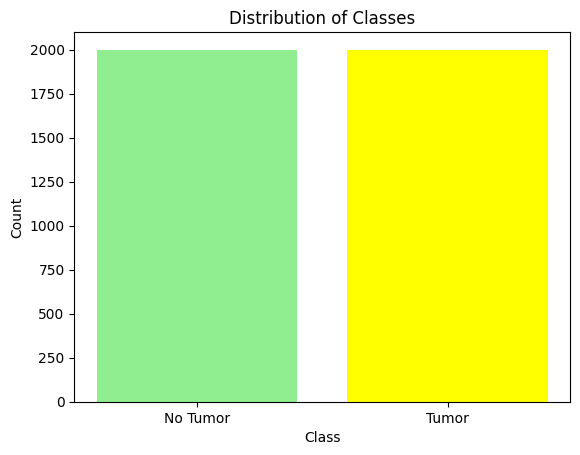

In [ ]:
import matplotlib.pyplot as plt

labels_count = [sum(y == 0), sum(y == 1)]
plt.bar(['No Tumor', 'Tumor'], labels_count, color=['lightgreen', 'yellow'])
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


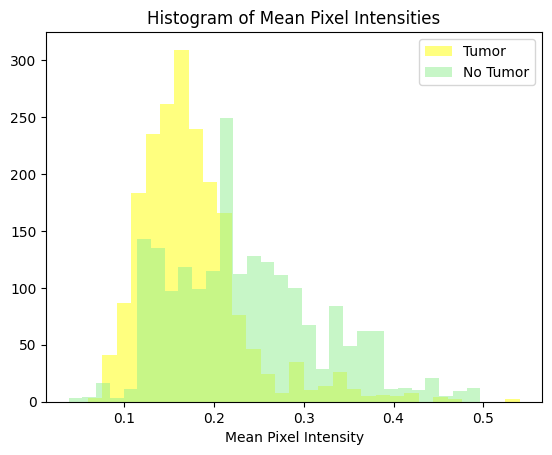

In [ ]:
mean_intensities = X.mean(axis=1)
mean_tumor = mean_intensities[y == 1]
mean_no_tumor = mean_intensities[y == 0]

plt.hist(mean_tumor, bins=30, alpha=0.5, label='Tumor', color= 'yellow')
plt.hist(mean_no_tumor, bins=30, alpha=0.5, label='No Tumor', color='lightgreen')
plt.xlabel('Mean Pixel Intensity')
plt.title('Histogram of Mean Pixel Intensities')
plt.legend()
plt.show()

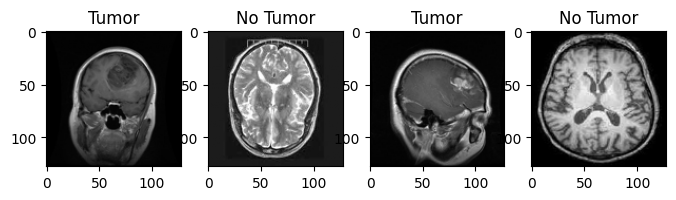

In [ ]:
# We only want to see 4 images from our data
n = 4

plt.figure(figsize=(8, 8))

for i in range(n):
    image = x_test[i]
    label = y_test[i]
    img_2d = image.reshape(128, 128)
    plt.subplot(1, n, i+1)
    plt.imshow(img_2d, cmap='gray')
    plt.title("Tumor" if label == 1 else "No Tumor")
plt.show()


### **Model Training and 1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(max_iter=2000, random_state=42)
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)

**Evaluating the Model**

Accuracy: 0.9458333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       583
           1       0.95      0.94      0.95       617

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



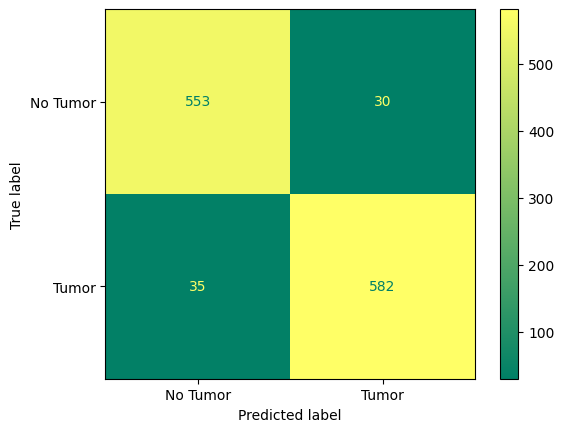


AUC:
 0.9762670588333411


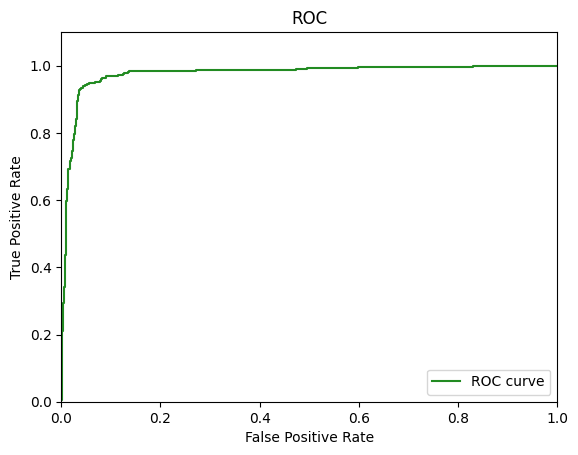

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap="summer")
plt.show()

#ROC and AUV
y_prob = model_1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC:\n", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='forestgreen', label='ROC curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

**Results from the Logistic Regression model show that:**

*   Logistic regression model correctly identifies 95% of the no-tumor scans and tumor scans 94%.

*   35 Tumor scans classified as non-tumor scan.

### **Model Training and Testing 2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

model_2.fit(x_train, y_train)

y_pred = model_2.predict(x_test)

**Evaluating the Model**

Accuracy:
 0.9683333333333334

Classification Report:
               precision    recall  f1-score   support

    No Tumor       0.95      0.98      0.97       583
       Tumor       0.98      0.96      0.97       617

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



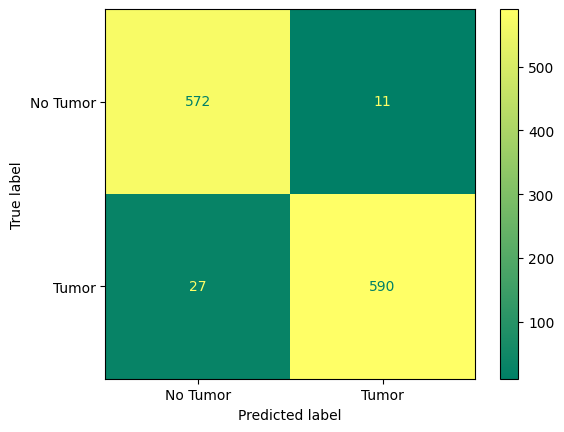


AUC:
 0.9939437492876225


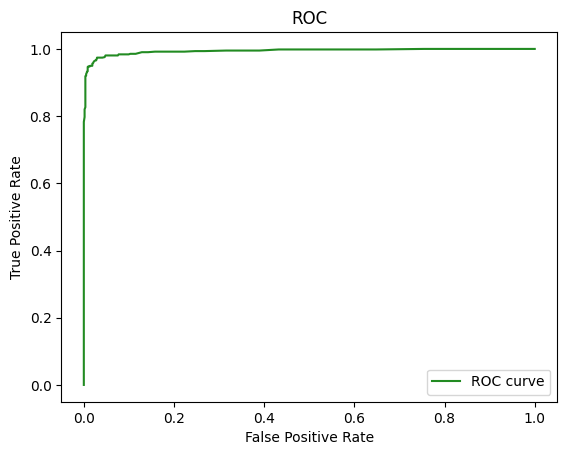

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", accuracy)

#Classification Report
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))

#Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap="summer")
plt.show()

#ROC and AUC
y_prob = model_2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC:\n", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='forestgreen', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

**Looks like a promising model**

**Results from Random Forest model show that:**

*   Compared to logistic regression it achived higher accuracy (96.8%)

*   Compared to logistic regression model there is reduction in false positive results. 27 tumor scan classified as non tumor.


**Overall Comparison of Two models**


*   **Accuracy:** Random Forest (0.968) > Logistic Regression (0.946).
*   **False Negatives:** 35 with Logistic Regression → 27 with Random Forest
*   **Precision & Recall:** Both are stronger with Random Forest
*   **AUC:** ~0.9939 in Random Forest and ~0.9763 in Logistic Regression, it highlights Random Forest is a better model to use in ranking tumor vs. no-tumor cases.

________________________________
*From now on I will try to improve Random Forest model in order to see if less false positive rates can be obtained.*

# **IMPORTANT!**
---

**Reducing False Negatives is the Main Goal**

In medical imaging **false negatives** are often the most critical errors. A *false negative* occurs when the model incorrectly labels a tumor-containing MRI as “no tumor.” Such mistakes can lead to missed diagnoses, delayed treatments which can cause severe consequences. Even few extra False Positive classifications are more acceptable than having a False Negative classification.


In this sense, when two models compared random forest model showed 96% Recall means that among all tumor scans it correctly classified 96% of them as tumors while having 4% of tumor scans identified as non-tumor. From the confusion matrix it can be seen that 27 of the tumors are classified as non-tumor.

### **Adjusting Model to Reduce False Negatives**


Hyperparameters that can be used to tune in the Random Forest in order to obtain better performance (Less FN):

* *n_estimators* is the number of the decision trees we want to apply
* *max_depth* is the number of each tree is allowed to grow to
* *min_samples_split* is the minimum number of samples required to split an internal node
* *min_samples_leaf* minimum number of samples at a leaf node
* *max_features* number of features to consider when splitting
* *class_weight* weights for each class


In [ ]:
from sklearn.model_selection import GridSearchCV

#Parameter grid to search for the best
random_forest_1 = RandomForestClassifier(random_state=42)

grid_search_result = GridSearchCV(
    estimator=random_forest_1,
    param_grid={
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5],
        'min_samples_split': [2, 5],
        'class_weight': [None, 'balanced', {0: 1, 1: 4}]
    },
    cv=5
)

grid_search_result.fit(x_train, y_train)

print("Best Parameters:", grid_search_result.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


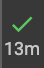

It took some time to perform gridsearch with the hyperparameters n_estimators, max_depth, min_samples_split, class_weight.


**Best Parameters chosen:**

* class_weight: balanced
* max_depth: None
* min_samples_split: 2
* n_estimators: 100

In [ ]:
#Creating Random Forest Regarding the Best Parameters chosen by the GridSearch

best_randomforest = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced'
)

# Train the model on the training set
best_randomforest.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_randomforest.predict(x_test)

Accuracy: 0.9683333333333334

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.95      0.98      0.97       583
       Tumor       0.98      0.96      0.97       617

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



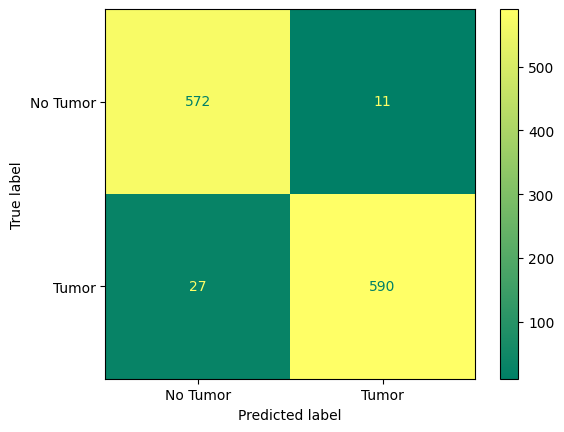


AUC:
 0.9936879884129204


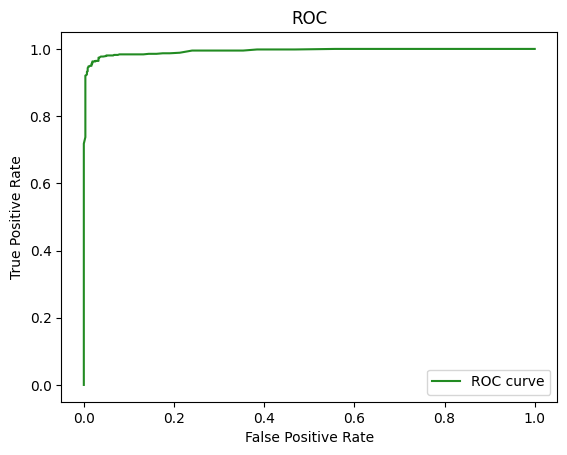

In [ ]:
#Evaluating New Model with Optimal Hyperparameters

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap="summer")
plt.show()

#ROC and AUC
y_prob = best_randomforest.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC:\n", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='forestgreen', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

**Optimizing hyperparameters did not make a significant change.**

## Dimensionality and PCA for Reducing Computation Time

Dimensionality detail of each image as follows:
* Each image has 128x128 pixels
* Not using RGB but Gray Scale is not adding additional dimensionality.
* Therefore total dimension of an image in 2D matrix is 128x128
* Flattened representation of the image in 1D array therefore has 16384 component

What if we reduce dimensionality in order to tune the model also regarding limited time and computation capacity?

Given the high dimensionality of the dataset, training models directly on the raw pixel data can be time-consuming and computationally expensive, especially for hyperparameter tuning. To address this, Principal Component Analysis (PCA) can be used to reduce the dimensionality while retaining most of the variance in the data. The key consideration is whether the PCA-transformed model will perform as efficiently as the original high-dimensional model in terms of predicting tumors accurately. Testing and evaluating the PCA-reduced model against the original model will ensure no significant loss of performance.

## **Reducing Dimensionality**

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.95) #Retaining 95% of the varience
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print(f"Original shape: {x_train.shape}")
print(f"PCA shape: {x_train_pca.shape}")

Original shape: (2799, 16384)
PCA shape: (2799, 509)


The original dataset before PCA had 2799 rows, each with 16,384 columns, representing the pixels of one flattened grayscale image (128x128 pixels).

After applying PCA, the transformed dataset now has 509 columns, which are principal components capturing 95% of the variance in the data. These components are not raw pixels but weighted combinations of the original pixel intensities.

As a result, the dimensionality of the data has been reduced from 16,384 to 509 features, significantly decreasing computational cost and training time. However, as highlighted before, it is crucial to evaluate whether a model trained on this reduced-dimensional dataset can maintain performance in detecting tumors as effectively as a model trained on the original high-dimensional dataset.

In [ ]:
#Training the Random Forest model on PCA applied data
random_forest_pca = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
)

random_forest_pca.fit(x_train_pca, y_train)

y_pred = random_forest_pca.predict(x_test_pca)

Accuracy: 0.9575

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.97      0.94      0.96       583
       Tumor       0.94      0.97      0.96       617

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



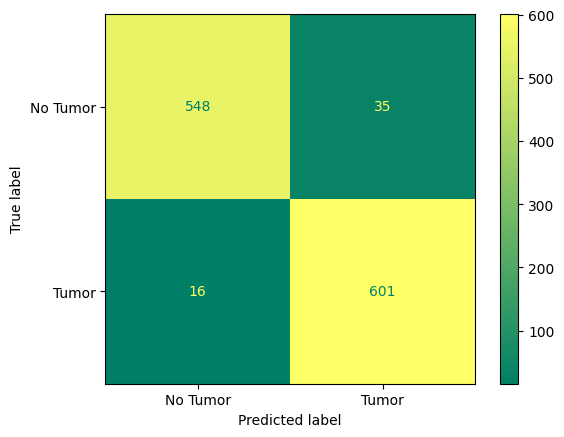


AUC:
 0.9914556407782914


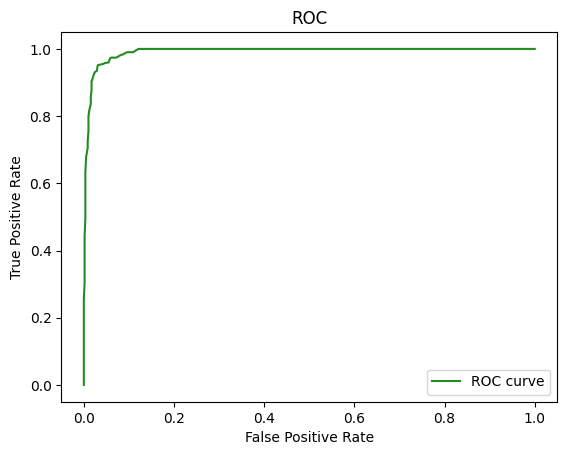

In [ ]:
#Evaluating New Model on PCA applied data

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap="summer")
plt.show()

#ROC and AUC
y_prob = random_forest_pca.predict_proba(x_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC:\n", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='forestgreen', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

***This model demonstrates excellent performance.***

**Accuracy**: 95% indicating a strong overall performance

**Precision and Recall for No Tumor Condition**: High precision (97%) ensures that most predicted "No Tumor" cases are correct, while recall (94%) means most actual "No Tumor" cases are identified.

**Precision and Recall for Tumor Condition**: Similarly, high precision (94%) and recall (97%) balance false positives and negatives for tumor detection.

**F1-Score:** 0.96 for both classes reflects a well-balanced model that performs equally well in identifying positive and negative cases.

**AUC:** A near-perfect value of 0.99 indicates the model’s excellent ability to distinguish between "Tumor" and "No Tumor."
______________
______________

But let's see if further performance adjustments can be done with more hyperparameter tuning.


In [ ]:
#Parameter grid to search for the PCA model
random_forest_pca_gs = RandomForestClassifier(random_state=42)

grid_search_result = GridSearchCV(
    estimator=random_forest_pca_gs,
    param_grid={
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5],
        'min_samples_split': [2, 5],
        'class_weight': [None, 'balanced', {0: 1, 1: 5}]
    },
    cv=5,
    scoring='recall'
)

grid_search_result.fit(x_train_pca, y_train)

print("Best Parameters:", grid_search_result.best_params_)

Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}


The best hyperparameters selected through grid search on the PCA-reduced data are as follows:

* class_weight: {0: 1, 1: 5}
* max_depth: 5
* min_samples_split: 5
* n_estimators: 150

Using these optimized hyperparameters, the model will now be trained on the PCA-transformed dataset with fewer components. The goal is to evaluate whether these adjustments result in improved tumor detection performance, even with the reduced dimensionality of the data.

In [ ]:
#Creating Random Forest on PCA Data with the Best Parameters chosen by the GridSearch

pca_random_forest = RandomForestClassifier(
    random_state=42,
    n_estimators=150,
    max_depth=5,
    min_samples_split=5,
    class_weight={0: 1, 1: 5}
)

# Train the model on the training set
pca_random_forest.fit(x_train_pca, y_train)

# Make predictions on the test set
y_pred = pca_random_forest.predict(x_test_pca)

Accuracy: 0.6583333333333333

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.99      0.30      0.46       583
       Tumor       0.60      1.00      0.75       617

    accuracy                           0.66      1200
   macro avg       0.80      0.65      0.60      1200
weighted avg       0.79      0.66      0.61      1200



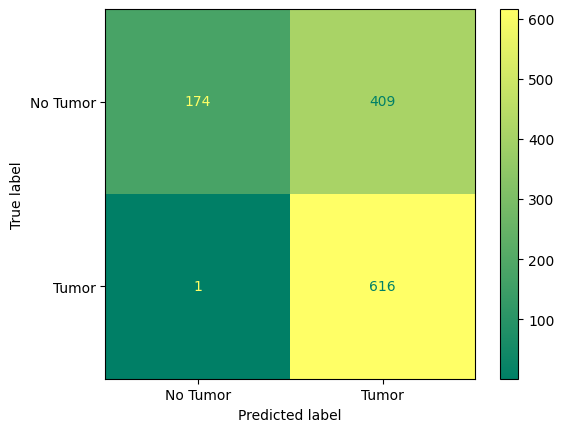


AUC:
 0.9177534187166919


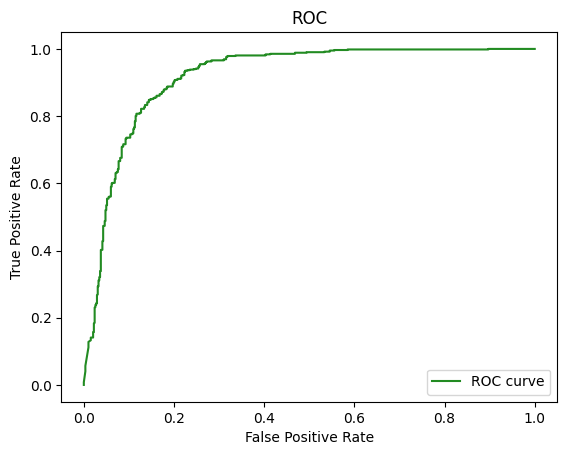

In [ ]:
#Evaluating New Model on PCA applied data and tuned Hyperparameters

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap="summer")
plt.show()

#ROC and AUC
y_prob = pca_random_forest.predict_proba(x_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC:\n", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='forestgreen', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

There with this hyperparameter tuning we see dramatic change in evaluation metrics.

Those classifications are highly biased towards predicting tumor.

**Precision: 0.99  Most predicted "No Tumor" cases are correct.**

**Recall: 0.30 Only 30% of actual "No Tumor" cases are identified, showing the model struggles to correctly classify this class.**

**Precision: 0.60 Only 60% of predicted "Tumor" cases are correct, meaning there are many false positives.**

**Recall: 1.00 The model identifies all actual "Tumor" cases correctly.**


# **!!**

In medical applications it is desired to have reduced false negatives and this model has the lowest false negatives compared to previous models ***but at what cost?***

While minimizing false negatives ensures that fewer critical cases (undetected tumors) are missed, this comes at the cost of a significant increase in false positives. This trade off that causes high number of false positives can lead to unnecessary follow-up tests, increased patient anxiety, added costs.

Therefore, while this model achieves the primary goal of reducing missed diagnoses, it is crucial to evaluate whether the trade-off in increased false positives is acceptable within the clinical context.

In [ ]:
#Redefining Hyperparameters Manually


pca_random_forest = RandomForestClassifier(
    random_state=42,
    n_estimators=170,
    max_depth=None,
    min_samples_split=5,
    class_weight={0: 1, 1: 2}
)

# Train the model on the training set
pca_random_forest.fit(x_train_pca, y_train)

# Make predictions on the test set
y_pred = pca_random_forest.predict(x_test_pca)

Accuracy: 0.9516666666666667

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.96      0.94      0.95       583
       Tumor       0.95      0.96      0.95       617

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



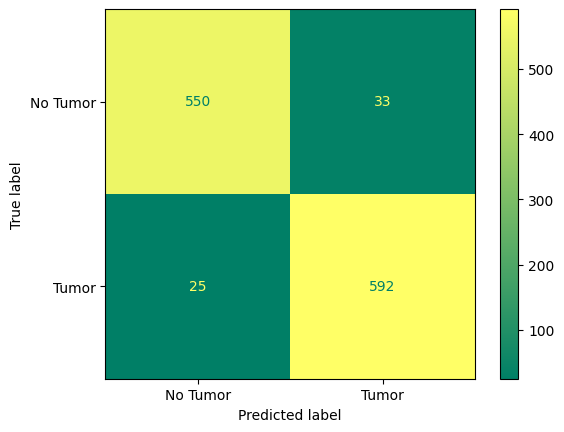


AUC:
 0.9898501852876338


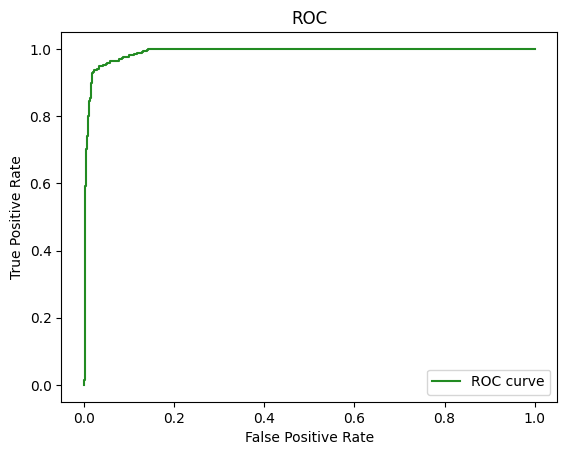

In [ ]:
#Evaluating New Model on PCA applied data and tuned Hyperparameters

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap="summer")
plt.show()

#ROC and AUC
y_prob = pca_random_forest.predict_proba(x_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC:\n", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='forestgreen', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

Before discussing the model it should be answered that what is a **"good model"** in medical imaging?
_________________________

**Clinical Priority:**

In medical imaging, such as tumor detection, false negatives are typically far more critical than false positives. The model should prioritize high recall for the detecting pathology, ensuring that as few true cases as possible are missed.
A recall of 95% or higher is often targeted in such cases.
_________________________

**Acceptable False Positives:**

Obtaining high false positive cases in order to have reduced false negatives can lead to unnecessary follow-up tests, the cost is usually considered acceptable compared to the risk of missing a tumor.
A reasonable precision 80–90% ensures the false positive rate is manageable.
_________________________

**Comparison with Human Performance:**

Benchmark the model's performance against radiologists or clinicians. Model shıuld predict more or close to the experts performance on classifying medical images.
_________________________

**Regulatory Standards:**

Regulatory agencies like the FDA (Food and Drug Administration) or EMA (European Medicines Agency) often require rigorous testing for AI models in medical imaging. Models should demonstrate consistent performance across diverse datasets and patient populations to reduce bias.
____________________

* Litjens, G., Kooi, T., Ehteshami Bejnordi, B., Setio, A. A. A., Ciompi, F., Ghafoorian, M., van der Laak, J. A. W. M., van Ginneken, B., & Sánchez, C. I. (2017). A survey on deep learning in medical image analysis. Medical Image Analysis, 42, 60–88. doi:10.1016

* Esteva, A., Robicquet, A., Ramsundar, B., Kuleshov, V., DePristo, M., Chou, K., … Dean, J. (2019). A guide to deep learning in healthcare. Nature Medicine, 25(1), 24–29. doi:10.1038/s41591-018-0316-z

* Topol, E. J. (2019). High-performance medicine: the convergence of human and artificial intelligence. Nature Medicine, 25(1), 44–56. doi:10.1038/s41591-018-0300-7





# **Comparison of Model Performance Metrics: With and Without PCA**

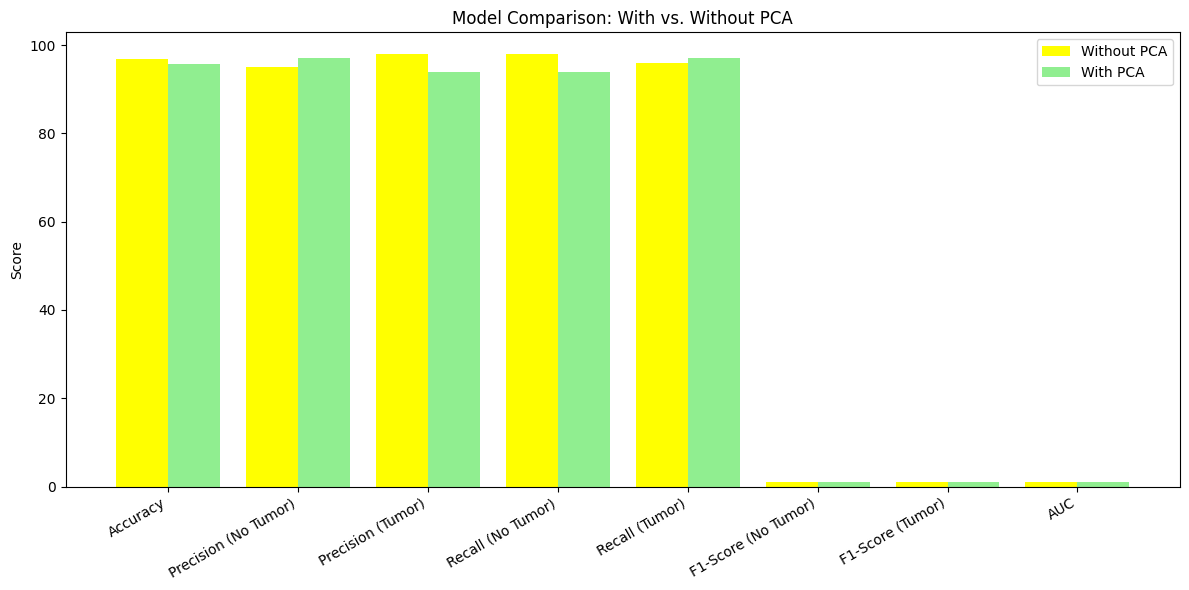

In [ ]:
# Define metrics
labels = ['Accuracy', 'Precision (No Tumor)', 'Precision (Tumor)',
          'Recall (No Tumor)', 'Recall (Tumor)', 'F1-Score (No Tumor)', 'F1-Score (Tumor)', 'AUC']

without_pca = [96.83, 95, 98, 98, 96, 0.97, 0.97,  0.99394]
with_pca = [95.75, 97, 94, 94, 97, 0.96, 0.96, 0.99145]

x = np.arange(len(labels))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, without_pca, width=0.4, label='Without PCA', color='yellow')
plt.bar(x + 0.2, with_pca, width=0.4, label='With PCA', color='lightgreen')

plt.xticks(x, labels, rotation=30, ha='right')
plt.ylabel('Score')
plt.title('Model Comparison: With vs. Without PCA')
plt.legend()
plt.tight_layout()
plt.show()


Comparing two models show that:

* Accuracy: The model without PCA slightly outperforms the PCA-applied model, though the difference is marginal.
* Precision and Recall (No Tumor and Tumor):
Without PCA, the performance is more balanced between "No Tumor" and "Tumor" classes.
With PCA, there is a slight trade-off, with improved recall for the "Tumor" class but slightly reduced recall for "No Tumor."
* F1-Score: Both models perform almost identically, with only a minor edge for the model without PCA.
* AUC: Both models show similarly high AUC, indicating their ability to distinguish between classes effectively.

___

**Without PCA:** This model provides slightly better accuracy and balance across all metrics. It's suitable when computational resources are sufficient.

**With PCA:** This model offers comparable performance but is computationally more efficient. It is ideal for scenarios where computational cost or time is a critical factor.

____

Choosing Random Forest PCA applied Model Key Reasons why:

* **High Performance and Simple**: The model achieves an accuracy of 95.75%, indicating that it classifies tumor and non-tumor cases correctly in most instances. Both precision (No Tumor: 97%, Tumor: 94%) and recall (No Tumor: 94%, Tumor: 97%) are strong, highlighting its ability to minimize both false positives and false negatives. The F1-scores of 0.96 for both classes and an AUC of 0.99 underscore the model’s excellent performance in distinguishing between the two classes with low number of pixels.
* **Robustness**: The model exceptional results with default settings. No hyperparameter tuning neeeded makes it realiable for applications where quick deployment of the model required. Despite dimension reduction by PCA, model still gives valid results for clinical domain.
* **Interpretability**: Using random forest model is relatively easier to interpret compared to the models like complex neural networks.
* **Clinical Relevance**: The model performance minimizin false negatives. Although there are false positives they are clinically manageable outweighing missing an important diagnosing like tumors.



_______
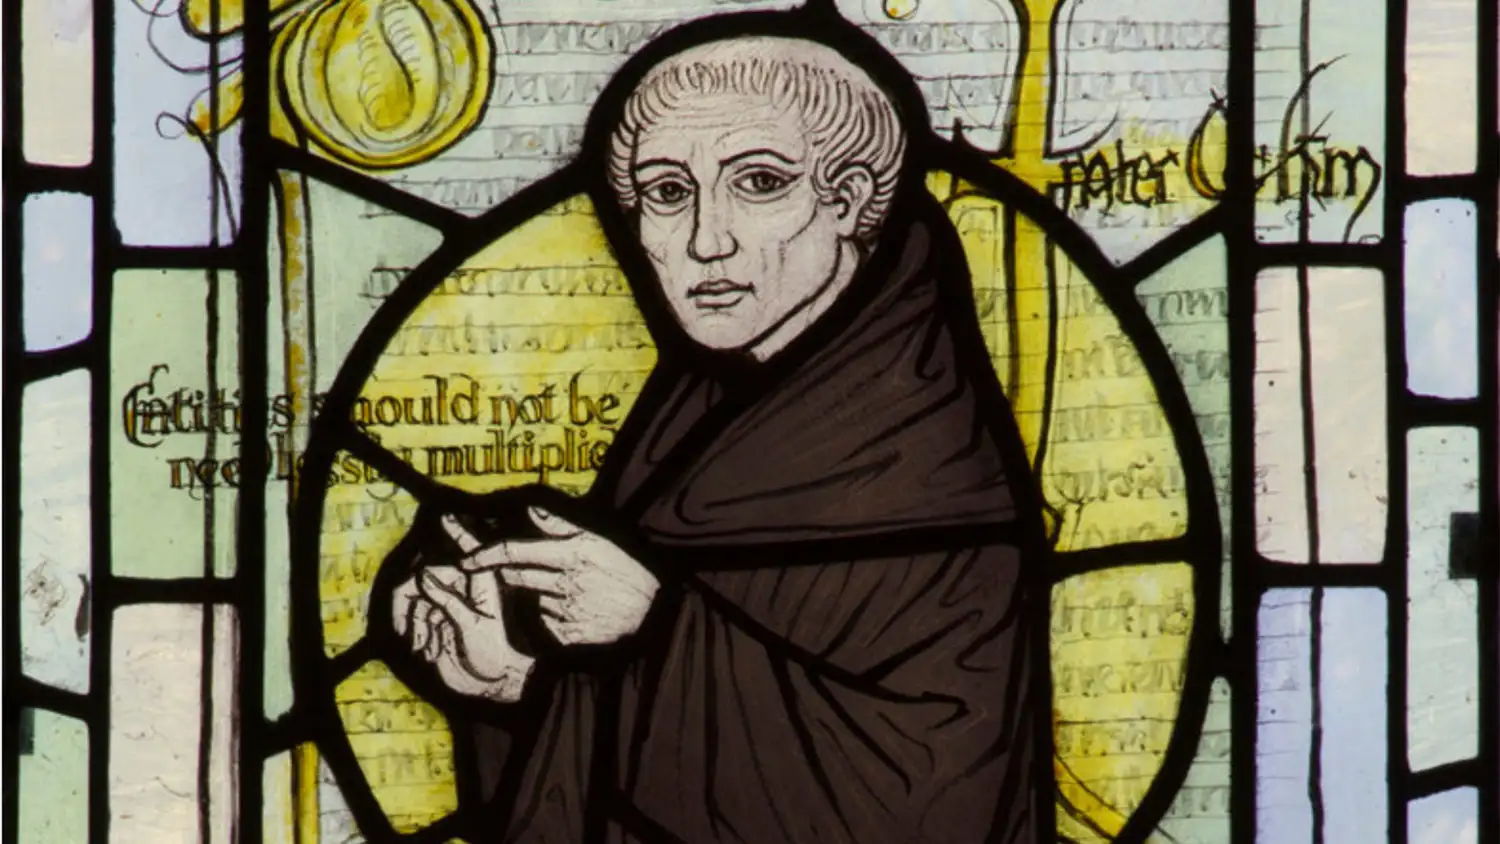


*'Plurality should not be posited without necessity.'*

*– William of Ockham, Summa Logicae*



## **Conclusion**
This project aimed to establish a strong foundation for applying machine learning in medical diagnostics. It highlights the importance of balancing model performance, clinical priorities, and computational efficiency, ensuring the outcomes align with practical healthcare needs. The results underscore the potential of machine learning to enhance diagnostic accuracy and efficiency.